In [25]:
import pandas as pd


data = {
    "date": ["2024-06-01", "2024-06-01", "2024-06-02", "2024-06-02", "2024-06-03", "2024-06-03"],
    "post": [
        "I love the new product from Evo digital! It's amazing!",
        "Evo digital has really outdone themselves with this latest release. So good!",
        "I'm not sure how I feel about the latest update from Evo digital.",
        "Evo digital's customer service is terrible.",
        "The quality of Evo digital products has gone downhill.",
        "Had a great experience with Evo digital today!"
    ]
}

df = pd.DataFrame(data)
df.head()

,date,post
0,2024-06-01,I love the new product from Evo digital! It's ...
1,2024-06-01,Evo digital has really outdone themselves with...
2,2024-06-02,I'm not sure how I feel about the latest updat...
3,2024-06-02,Evo digital's customer service is terrible.
4,2024-06-03,The quality of Evo digital products has gone d...


In [26]:
import re

def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['cleaned_post'] = df['post'].apply(preprocess_text)
df.head()

,date,post,cleaned_post
0,2024-06-01,I love the new product from Evo digital! It's ...,i love the new product from evo digital its am...
1,2024-06-01,Evo digital has really outdone themselves with...,evo digital has really outdone themselves with...
2,2024-06-02,I'm not sure how I feel about the latest updat...,im not sure how i feel about the latest update...
3,2024-06-02,Evo digital's customer service is terrible.,evo digitals customer service is terrible
4,2024-06-03,The quality of Evo digital products has gone d...,the quality of evo digital products has gone d...


In [15]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [27]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['cleaned_post'].apply(analyze_sentiment)
df.head()

,date,post,cleaned_post,sentiment
0,2024-06-01,I love the new product from Evo digital! It's ...,i love the new product from evo digital its am...,positive
1,2024-06-01,Evo digital has really outdone themselves with...,evo digital has really outdone themselves with...,positive
2,2024-06-02,I'm not sure how I feel about the latest updat...,im not sure how i feel about the latest update...,positive
3,2024-06-02,Evo digital's customer service is terrible.,evo digitals customer service is terrible,negative
4,2024-06-03,The quality of Evo digital products has gone d...,the quality of evo digital products has gone d...,neutral


In [29]:
pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.4 kB 279.3 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/301.4 kB 490.2 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/301.4 kB 701.4 kB/s eta 0:00:01
   --------------------------------- ---- 266.2/301.4 kB 962.4 kB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- 301.4/301.4 kB 808.8 kB/s eta 0:00:00
Not

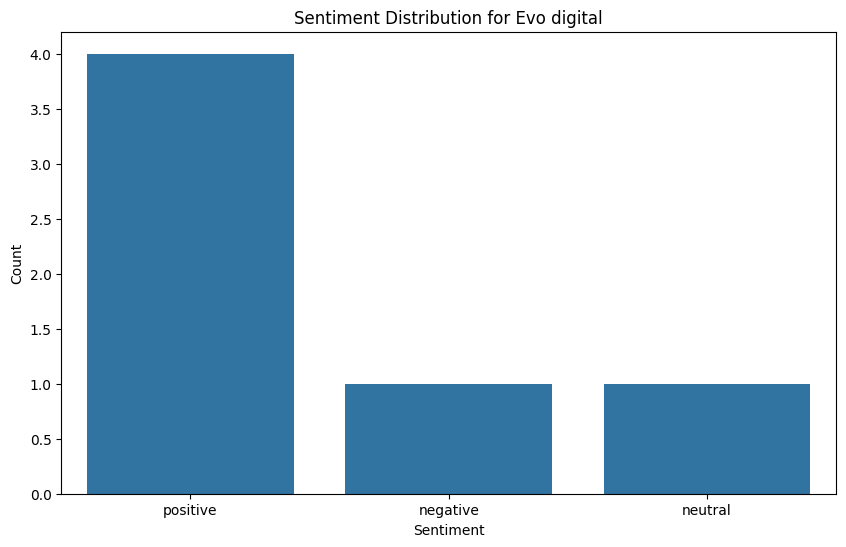

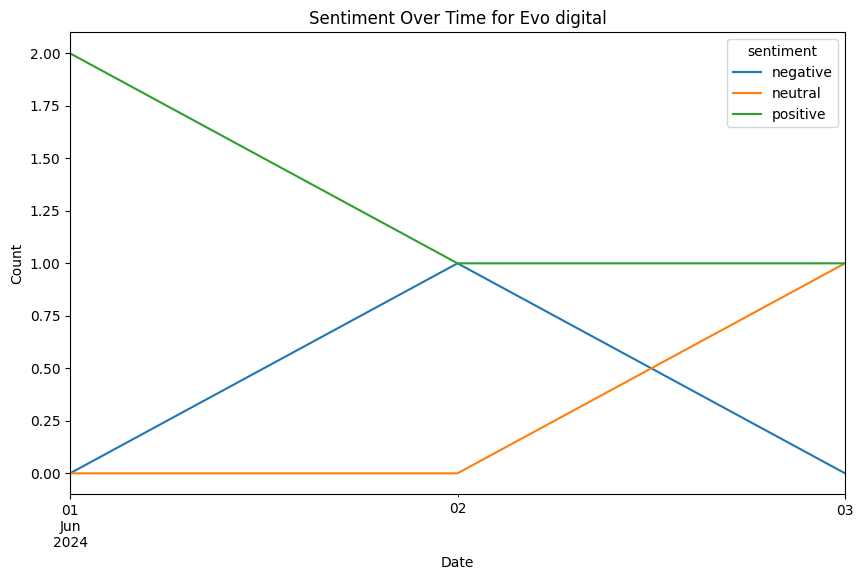

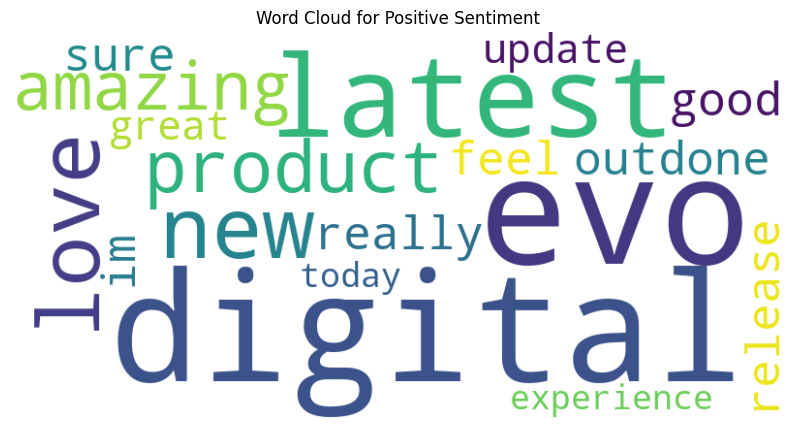

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution for Evo digital')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Sentiment over time
df['date'] = pd.to_datetime(df['date'])
sentiment_over_time = df.groupby(['date', 'sentiment']).size().unstack().fillna(0)

sentiment_over_time.plot(kind='line', figsize=(10, 6))
plt.title('Sentiment Over Time for Evo digital')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

# Word cloud for positive sentiment
from wordcloud import WordCloud

positive_posts = ' '.join(df[df['sentiment'] == 'positive']['cleaned_post'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_posts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')
plt.show()